import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('country_wise_latest.csv')

#Convert columns to appropriate types if needed

In [4]:
 
print(data.isnull().sum())
 
data['Confirmed'] = pd.to_numeric(data['Confirmed'], errors='coerce')
data['Deaths'] = pd.to_numeric(data['Deaths'], errors='coerce')
data['Recovered'] = pd.to_numeric(data['Recovered'], errors='coerce')
data['Active'] = pd.to_numeric(data['Active'], errors='coerce')


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [5]:
# Basic summary statistics
print(data.describe())

# Check the number of countries/regions
print(data['Country/Region'].nunique())

# Check the unique WHO regions
print(data['WHO Region'].unique())


          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635      

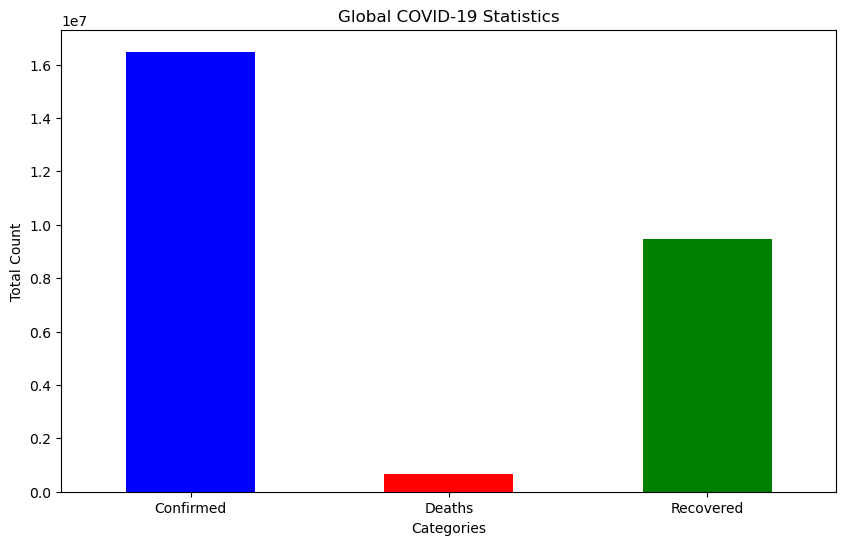

In [6]:
# Plot total Confirmed, Deaths, and Recovered globally
fig, ax = plt.subplots(figsize=(10, 6))
global_stats = data[['Confirmed', 'Deaths', 'Recovered']].sum()
global_stats.plot(kind='bar', color=['blue', 'red', 'green'], ax=ax)
ax.set_title('Global COVID-19 Statistics')
ax.set_ylabel('Total Count')
ax.set_xlabel('Categories')
plt.xticks(rotation=0)
plt.show()


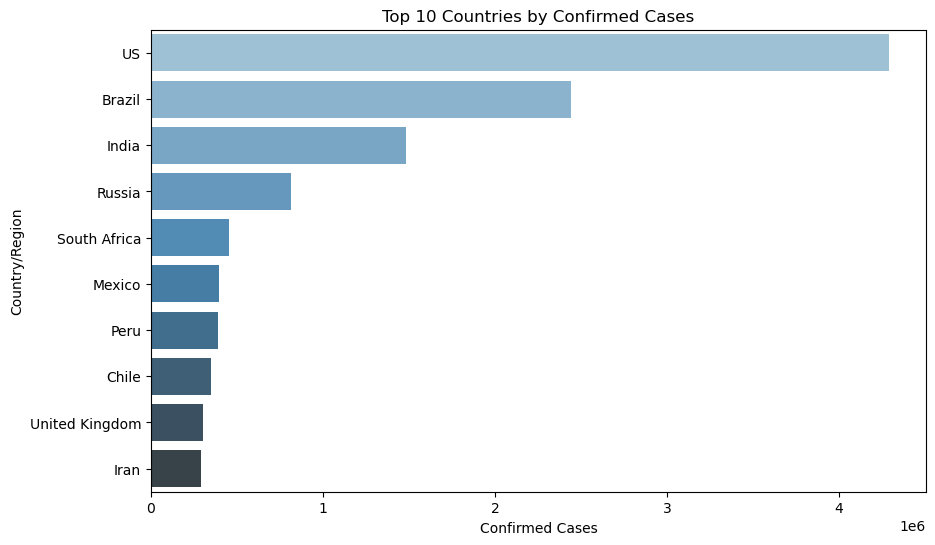

In [7]:
# Top 10 countries with the highest confirmed cases
top_10_confirmed = data[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_confirmed, palette='Blues_d')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.show()


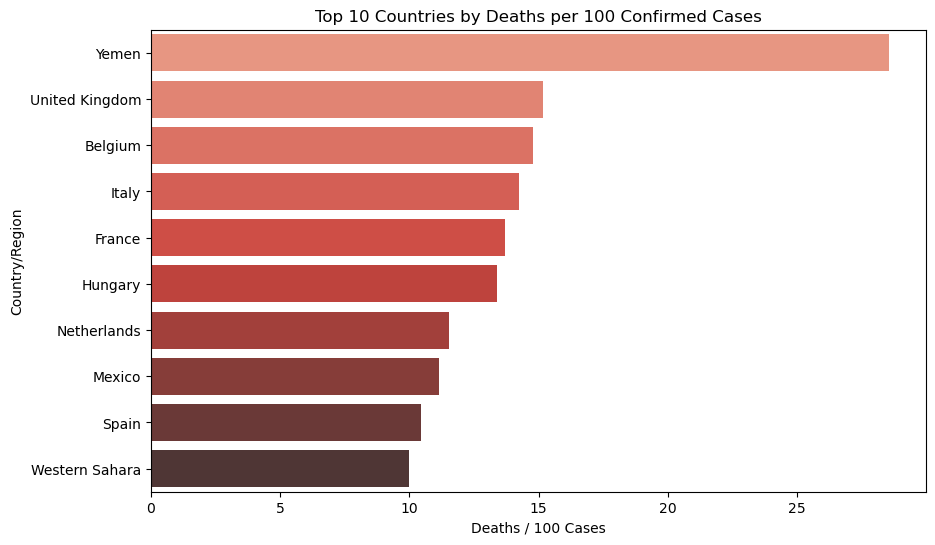

In [8]:
# Plot Deaths per 100 Confirmed cases
plt.figure(figsize=(10, 6))
sns.barplot(x='Deaths / 100 Cases', y='Country/Region', data=data.sort_values(by='Deaths / 100 Cases', ascending=False).head(10), palette='Reds_d')
plt.title('Top 10 Countries by Deaths per 100 Confirmed Cases')
plt.xlabel('Deaths / 100 Cases')
plt.ylabel('Country/Region')
plt.show()


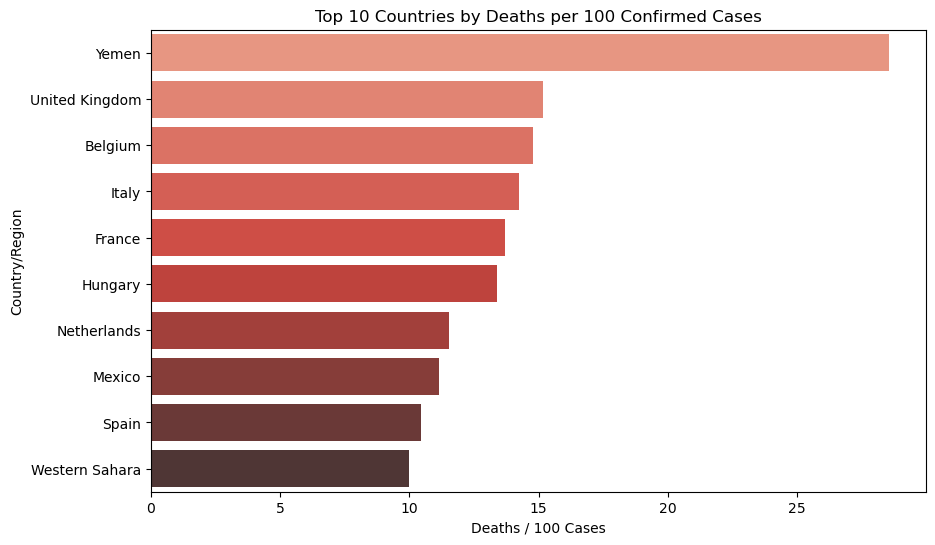

In [9]:
# Plot Deaths per 100 Confirmed cases
plt.figure(figsize=(10, 6))
sns.barplot(x='Deaths / 100 Cases', y='Country/Region', data=data.sort_values(by='Deaths / 100 Cases', ascending=False).head(10), palette='Reds_d')
plt.title('Top 10 Countries by Deaths per 100 Confirmed Cases')
plt.xlabel('Deaths / 100 Cases')
plt.ylabel('Country/Region')
plt.show()


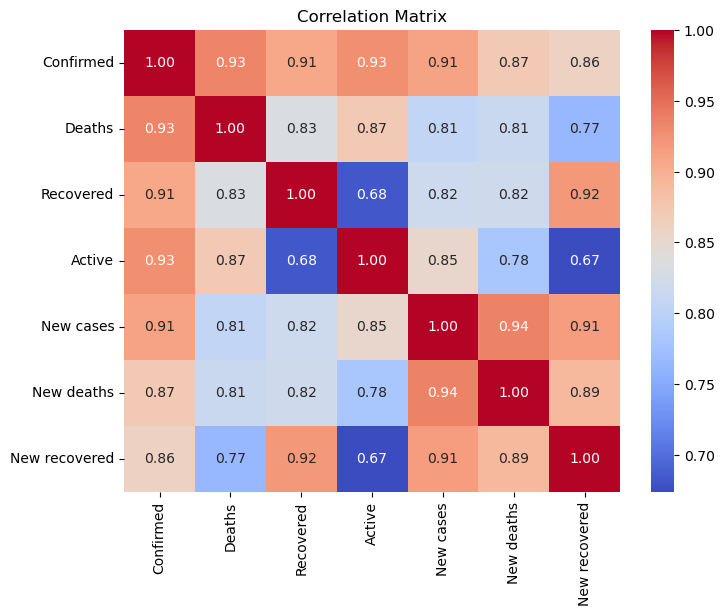

In [10]:
# Correlation heatmap
correlation_matrix = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


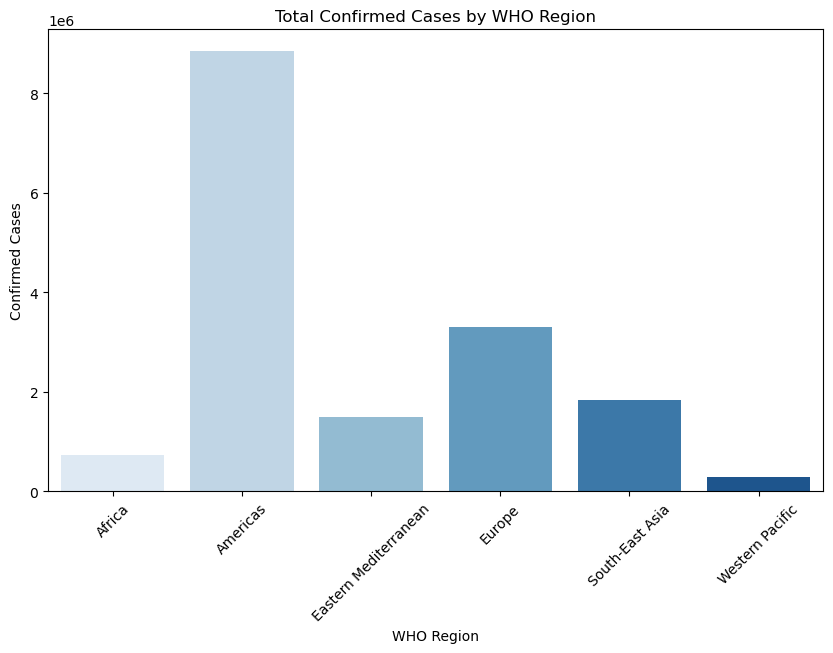

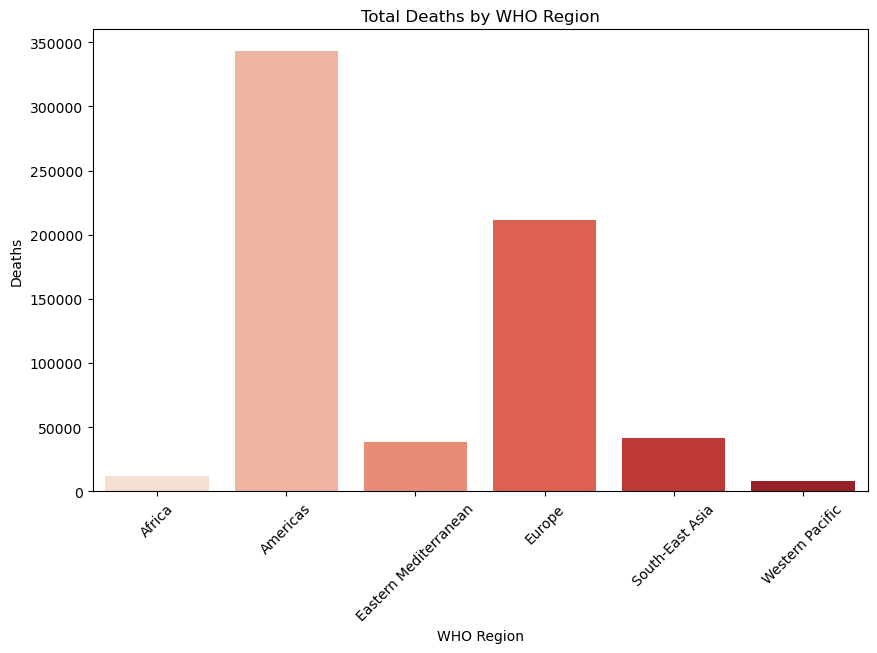

In [11]:
# Total cases and deaths per WHO region
region_stats = data.groupby('WHO Region')[['Confirmed', 'Deaths']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='WHO Region', y='Confirmed', data=region_stats, palette='Blues')
plt.title('Total Confirmed Cases by WHO Region')
plt.ylabel('Confirmed Cases')
plt.xlabel('WHO Region')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='WHO Region', y='Deaths', data=region_stats, palette='Reds')
plt.title('Total Deaths by WHO Region')
plt.ylabel('Deaths')
plt.xlabel('WHO Region')
plt.xticks(rotation=45)
plt.show()


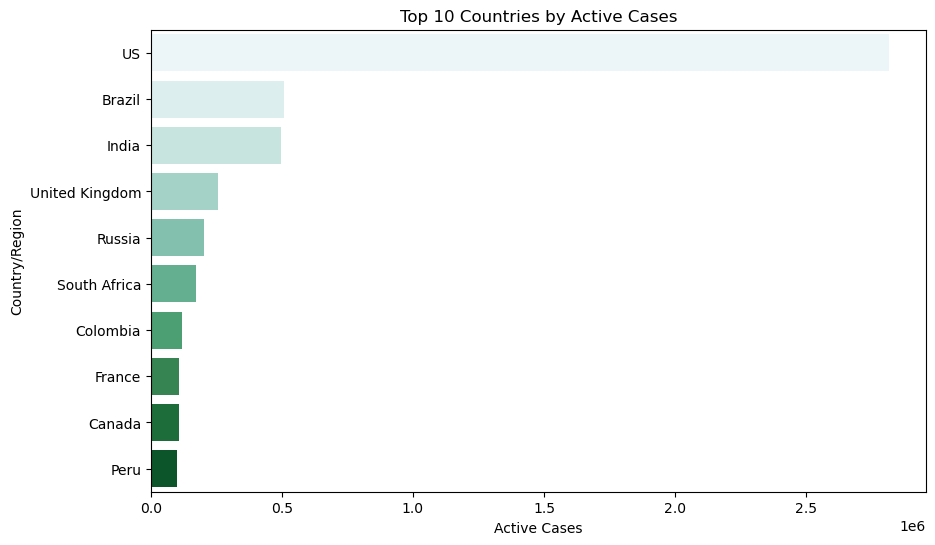

In [12]:
# Top 10 countries with highest active cases
top_10_active = data[['Country/Region', 'Active']].sort_values(by='Active', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Active', y='Country/Region', data=top_10_active, palette='BuGn')
plt.title('Top 10 Countries by Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('Country/Region')
plt.show()


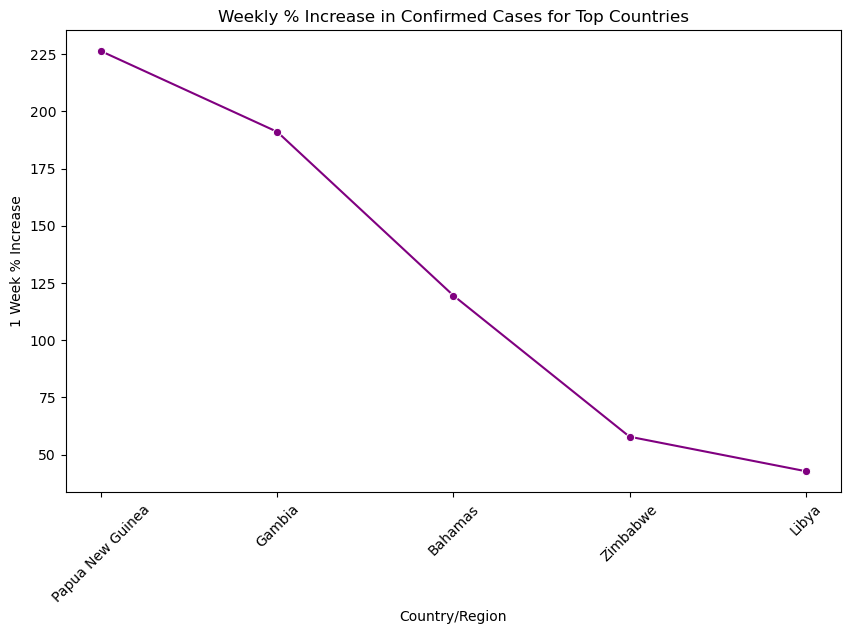

In [13]:
# Top 5 countries with the highest weekly % increase in confirmed cases
top_5_growth = data[['Country/Region', '1 week % increase']].sort_values(by='1 week % increase', ascending=False).head(5)

# Plot the weekly % change for top countries
plt.figure(figsize=(10, 6))
sns.lineplot(x='Country/Region', y='1 week % increase', data=top_5_growth, marker='o', color='purple')
plt.title('Weekly % Increase in Confirmed Cases for Top Countries')
plt.xlabel('Country/Region')
plt.ylabel('1 Week % Increase')
plt.xticks(rotation=45)
plt.show()


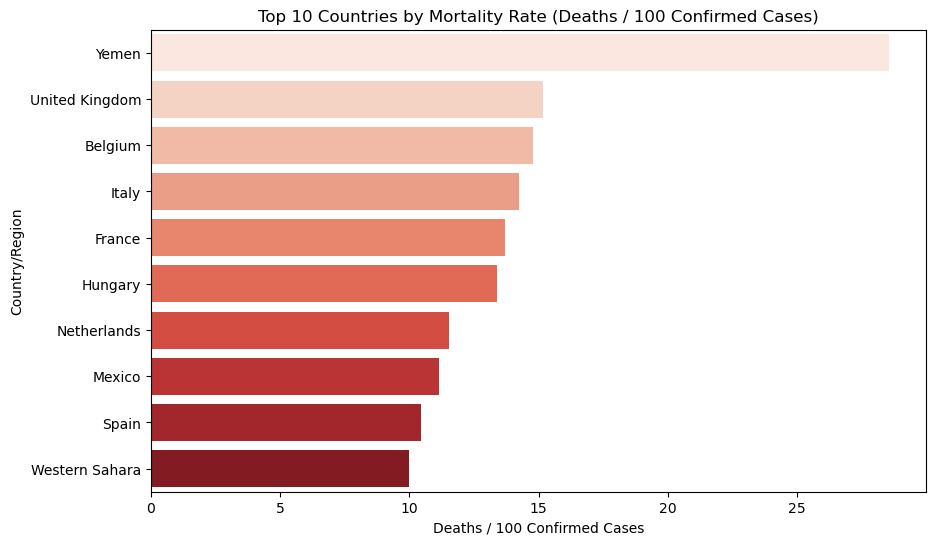

In [17]:
# Mortality rate (deaths per 100 confirmed cases)
plt.figure(figsize=(10, 6))
sns.barplot(x='Deaths / 100 Cases', y='Country/Region', data=data.sort_values(by='Deaths / 100 Cases', ascending=False).head(10), palette='Reds')
plt.title('Top 10 Countries by Mortality Rate (Deaths / 100 Confirmed Cases)')
plt.xlabel('Deaths / 100 Confirmed Cases')
plt.ylabel('Country/Region')
plt.show()
